# Heart Disease

The dataset is made of 14 attributes:

1) age
2) sex
3) cp: chest pain type (4 values)
4) trestbps:resting blood pressure
5) chol: serum cholestoral in mg/dl
6) fbs: fasting blood sugar > 120 mg/dl
7) restecg: resting electrocardiographic results (values 0,1,2)
8) thalach: maximum heart rate achieved
9) exang: exercise induced angina
10) oldpeak: ST depression induced by exercise relative to rest
11) slope: the slope of the peak exercise ST segment
12) ca: number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) Target: refers to the presence of heart disease in the patient, 0 = no disease and 1 = disease.

# Data prep & EDA

In [91]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [92]:
# Loading the dataset
data = pd.read_csv('heart.csv')

In [93]:
#Preview
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [94]:
data.shape

(1025, 14)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [96]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


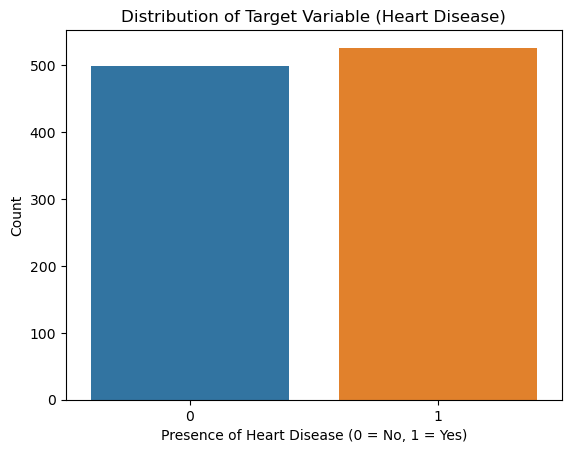

In [97]:
# Distribution of target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable (Heart Disease)')
plt.xlabel('Presence of Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

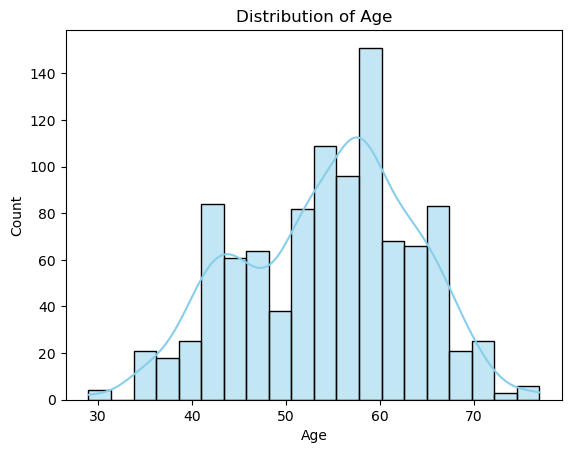

In [98]:
# Distribution of Age
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

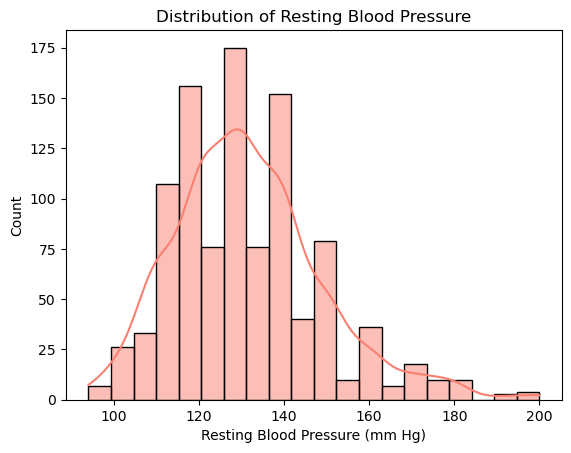

In [99]:
# Distribution of resting blood pressure (trestbps)
sns.histplot(data['trestbps'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.show()

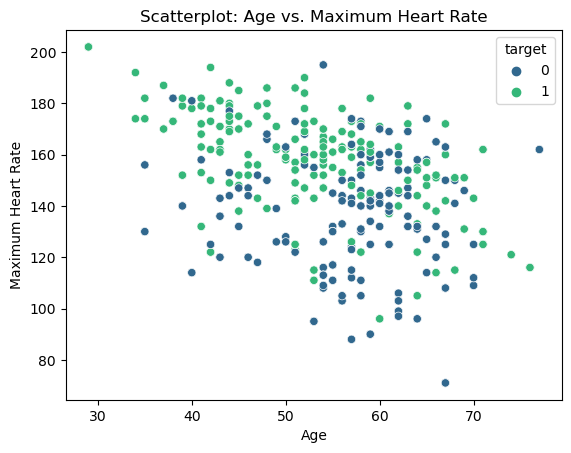

In [100]:
# Scatterplot: Age vs. Maximum Heart Rate (thalach)
sns.scatterplot(x='age', y='thalach', hue='target', data=data, palette='viridis')
plt.title('Scatterplot: Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

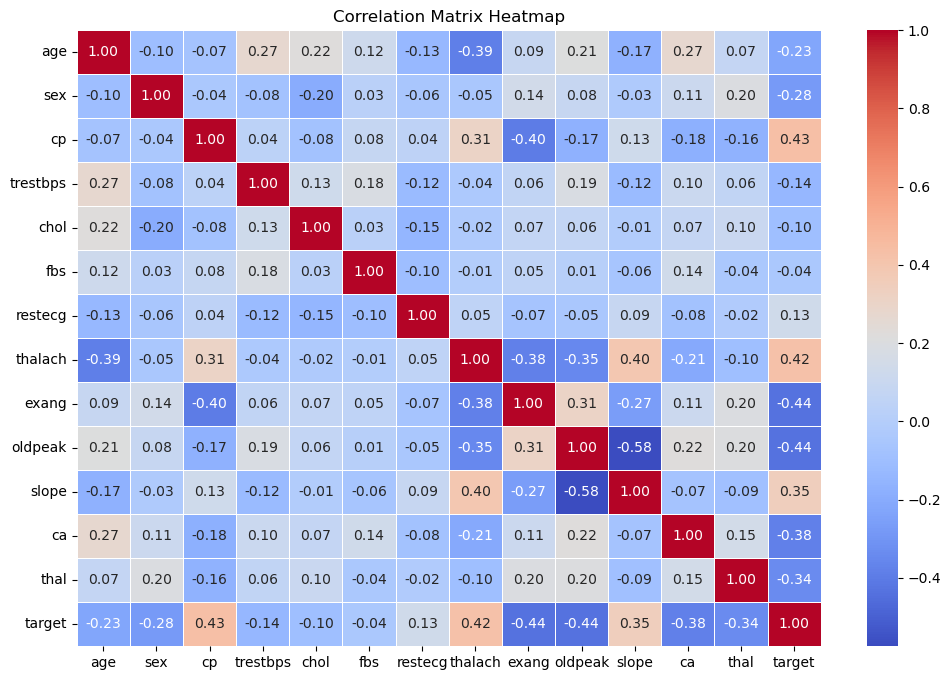

In [101]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [102]:
# Converting categorical variables to dummy variables
cp = pd.get_dummies(data['cp'], prefix='cp', drop_first=True)
restecg = pd.get_dummies(data['restecg'], prefix='restecg', drop_first=True)
slope = pd.get_dummies(data['slope'], prefix='slope', drop_first=True)
ca = pd.get_dummies(data['ca'], prefix='ca', drop_first=True)
thal = pd.get_dummies(data['thal'], prefix='thal', drop_first=True)

In [103]:
# Concatenate dummy variables with the original dataset
data = pd.concat([data, cp, restecg, slope, ca, thal], axis=1)
data.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)

In [104]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,0,...,0,1,0,0,0,1,0,0,1,0


# Classification with Traditional Models

In [105]:
# Splitting dataset into features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [106]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [107]:
X_train.shape, X_val.shape, X_test.shape

((615, 22), (205, 22), (205, 22))

In [108]:
y_train.shape, y_val.shape, y_test.shape

((615,), (205,), (205,))

In [109]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [110]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Extreme Gradient Boost': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}

In [111]:
# Evaluate models
val_results = {}
test_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Validate the model
    y_val_pred = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    val_results[name] = {'Accuracy': accuracy_val, 'Precision': precision_val, 'Recall': recall_val, 'F1': f1_val}
    
    
    # Evaluate on Testing Set
    y_test_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    test_results[name] = {'Accuracy': accuracy_test, 'Precision': precision_test, 'Recall': recall_test, 'F1': f1_test}

In [112]:
# Converting results to DataFrame for visualization
val_df = pd.DataFrame(val_results).T
test_df = pd.DataFrame(test_results).T

In [113]:
# Printing results for comparison
print("Validation Set Performance:")
print(val_df)
print("\nTest Set Performance:")
print(test_df)

Validation Set Performance:
                        Accuracy  Precision    Recall        F1
Logistic Regression     0.921951   0.888889  0.971963  0.928571
Naive Bayes             0.863415   0.876190  0.859813  0.867925
Random Forest           0.980488   0.990476  0.971963  0.981132
Extreme Gradient Boost  0.970732   0.971963  0.971963  0.971963
K-Nearest Neighbors     0.882927   0.887850  0.887850  0.887850
Decision Tree           0.985366   0.972727  1.000000  0.986175
Support Vector Machine  0.936585   0.927273  0.953271  0.940092

Test Set Performance:
                        Accuracy  Precision    Recall        F1
Logistic Regression     0.824390   0.781513  0.902913  0.837838
Naive Bayes             0.814634   0.787611  0.864078  0.824074
Random Forest           0.990244   0.980952  1.000000  0.990385
Extreme Gradient Boost  0.946341   0.950980  0.941748  0.946341
K-Nearest Neighbors     0.824390   0.801802  0.864078  0.831776
Decision Tree           0.980488   0.962617  1.000000

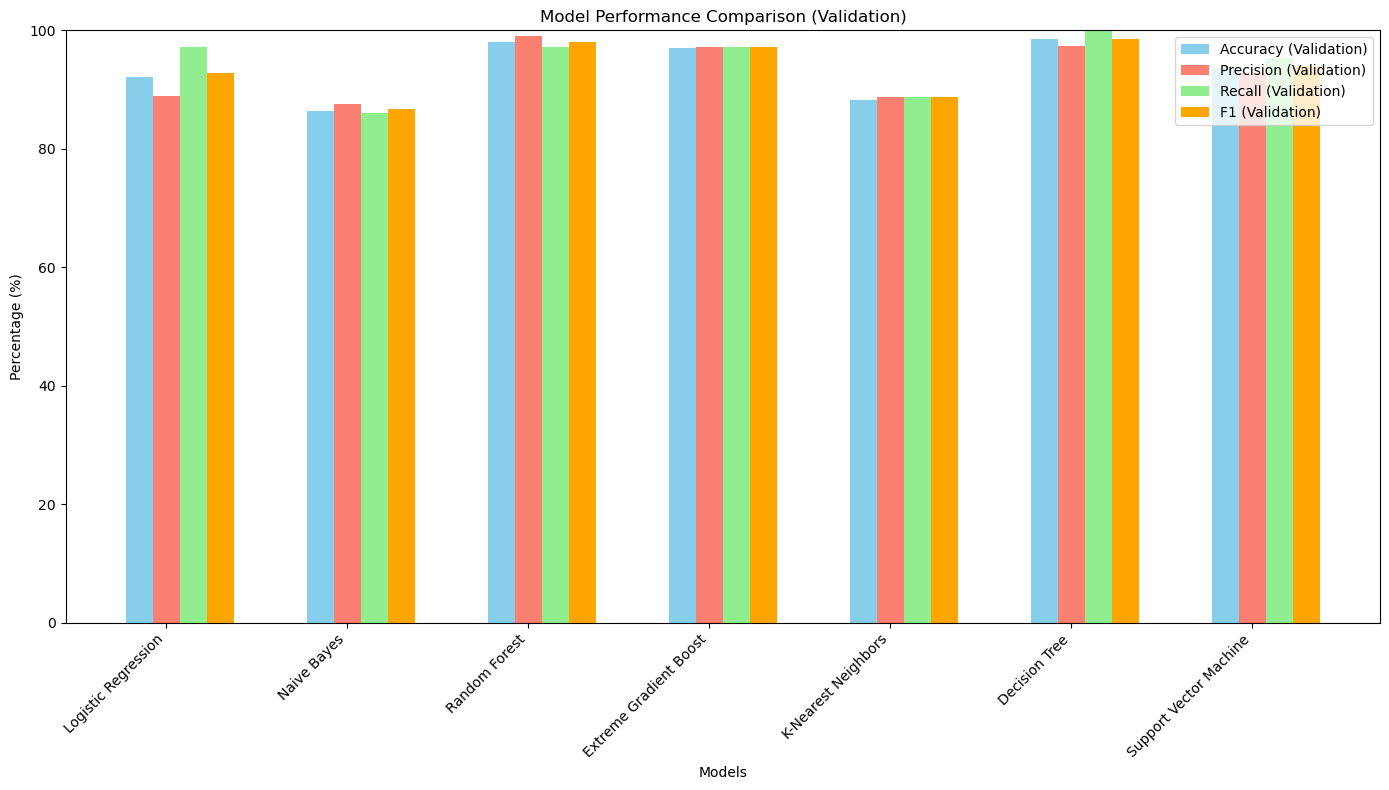

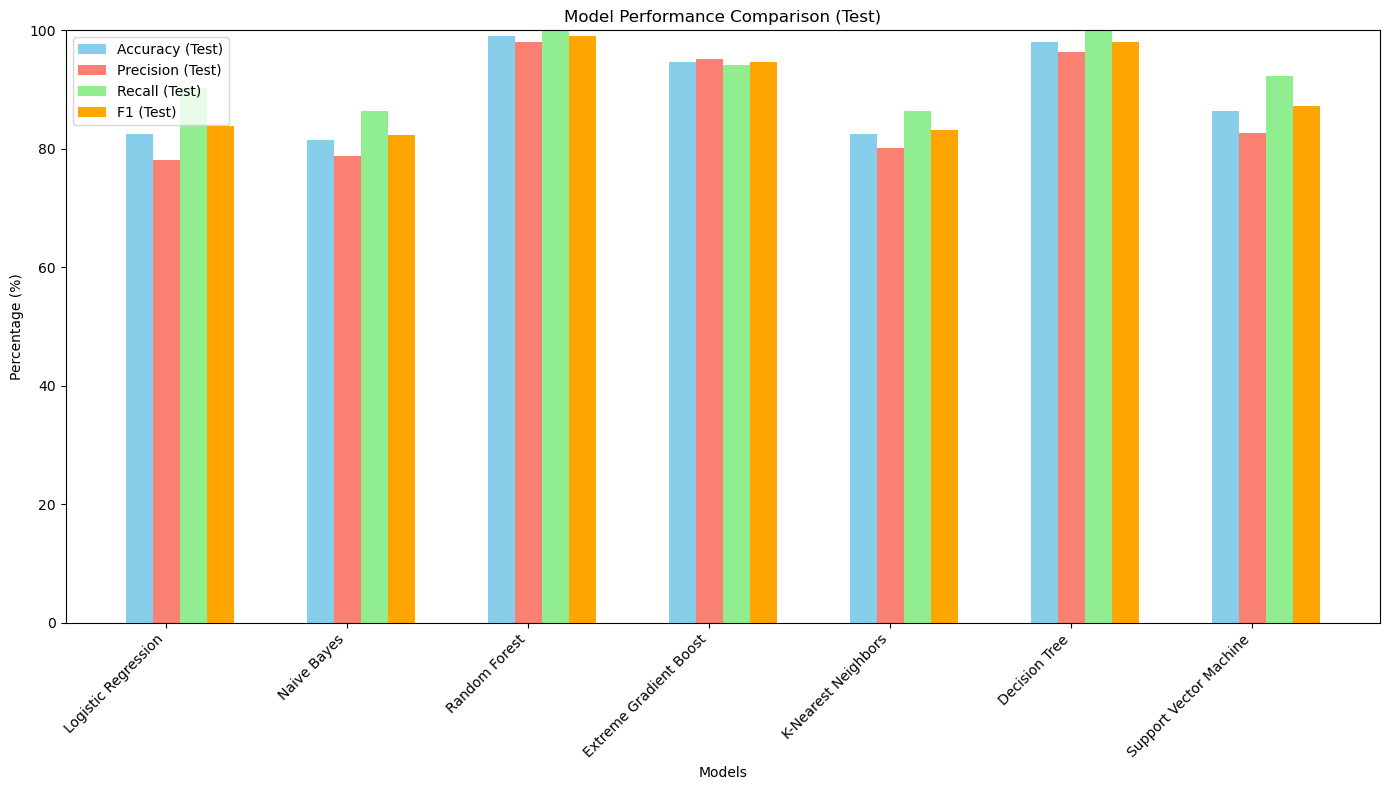

In [114]:
# Plot for validation set performance
plt.figure(figsize=(14, 8))

# Define the width of each bar
bar_width = 0.15

# Define the position of each bar on the x-axis
index = np.arange(len(models))

# Define the colors for each metric
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Iterate through each metric and plot bars side by side
for i, metric in enumerate(val_df.columns):
    plt.bar(index + i * bar_width, val_df[metric] * 100, bar_width, label=metric + ' (Validation)', color=colors[i])

# Set x-axis label, tick labels, and title
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Model Performance Comparison (Validation)')
plt.xticks(index + bar_width, val_df.index, rotation=45, ha='right')
plt.ylim(0, 100)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Plot for test set performance
plt.figure(figsize=(14, 8))

# Iterate through each metric and plot bars side by side
for i, metric in enumerate(test_df.columns):
    plt.bar(index + i * bar_width, test_df[metric] * 100, bar_width, label=metric + ' (Test)', color=colors[i])

# Set x-axis label, tick labels, and title
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Model Performance Comparison (Test)')
plt.xticks(index + bar_width, test_df.index, rotation=45, ha='right')
plt.ylim(0, 100)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [115]:
# Classification report for each model
for name, model in models.items():  
    y_pred = model.predict(X_test)   
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    print("\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       102
           1       0.78      0.90      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       102
           1       0.79      0.86      0.82       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       102
           1       0.98      1.00      0.99       103

    accuracy                           0.99       2

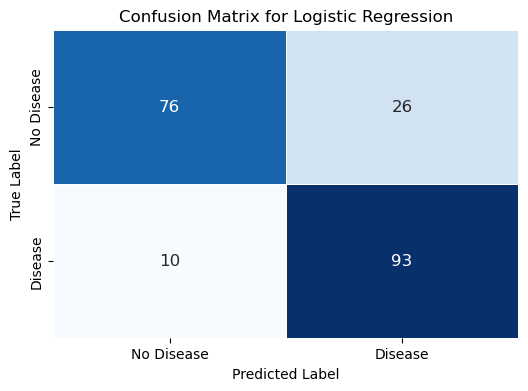

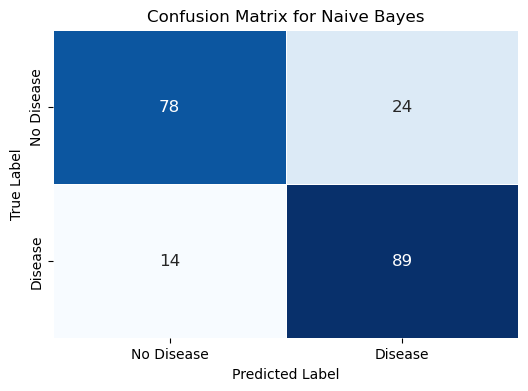

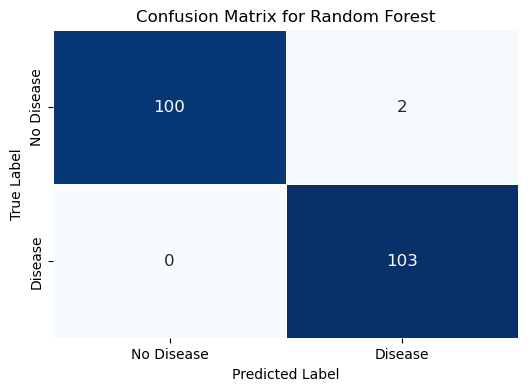

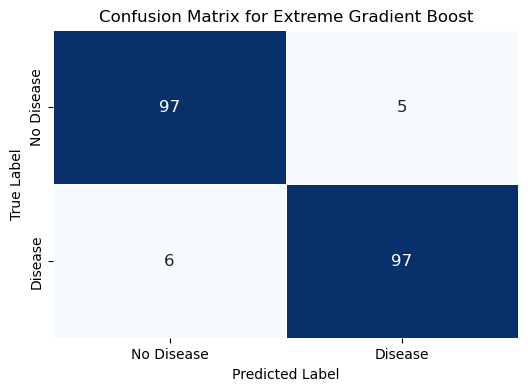

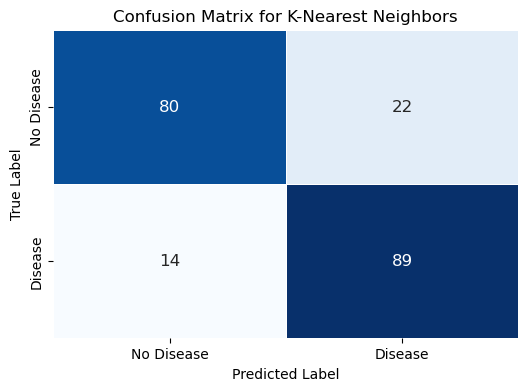

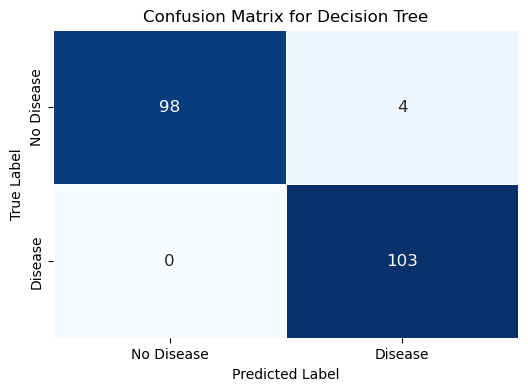

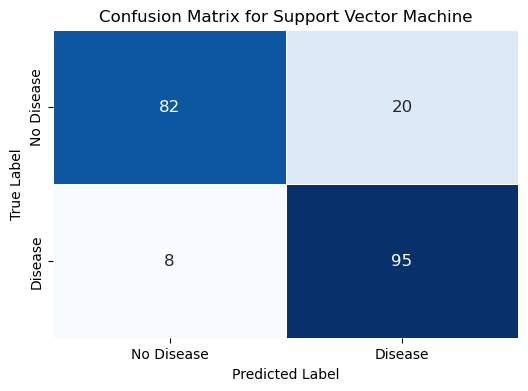

In [116]:
# Confusion matrix for each model
for name, model in models.items(): 
    y_pred = model.predict(X_test)   
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                annot_kws={"size": 12}, linewidths=0.5, 
                xticklabels=['No Disease', 'Disease'], 
                yticklabels=['No Disease', 'Disease'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']  
}


log_reg_grid = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, verbose=1)
log_reg_grid.fit(X_train, y_train)
log_reg_model = log_reg_grid.best_estimator_

# Hyperparameter tuning for K-Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)
knn_grid.fit(X_train, y_train)
knn_model = knn_grid.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [40]:
# Evaluating models on the validation set
val_log_reg_preds = log_reg_model.predict(X_val)
val_knn_preds = knn_model.predict(X_val)

val_metrics = {}
for model_name, predictions in zip(["Logistic Regression", "K-Nearest Neighbors"], [val_log_reg_preds, val_knn_preds]):
    accuracy = accuracy_score(y_val, predictions)
    precision = precision_score(y_val, predictions, average='weighted')
    recall = recall_score(y_val, predictions, average='weighted')
    f1 = f1_score(y_val, predictions, average='weighted')

    val_metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

In [41]:
# Evaluating models on the test set
test_log_reg_preds = log_reg_model.predict(X_test)
test_knn_preds = knn_model.predict(X_test)

test_metrics = {}
for model_name, predictions in zip(["Logistic Regression", "K-Nearest Neighbors"], [test_log_reg_preds, test_knn_preds]):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    test_metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

In [42]:
# Results
print("Validation Set Performance:")
for model_name, metrics in val_metrics.items():
    print(model_name)
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()

print("Test Set Performance:")
for model_name, metrics in test_metrics.items():
    print(model_name)
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print()

Validation Set Performance:
Logistic Regression
Accuracy: 0.9220
Precision: 0.9257
Recall: 0.9220
F1 Score: 0.9216

K-Nearest Neighbors
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Test Set Performance:
Logistic Regression
Accuracy: 0.8244
Precision: 0.8324
Recall: 0.8244
F1 Score: 0.8232

K-Nearest Neighbors
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000



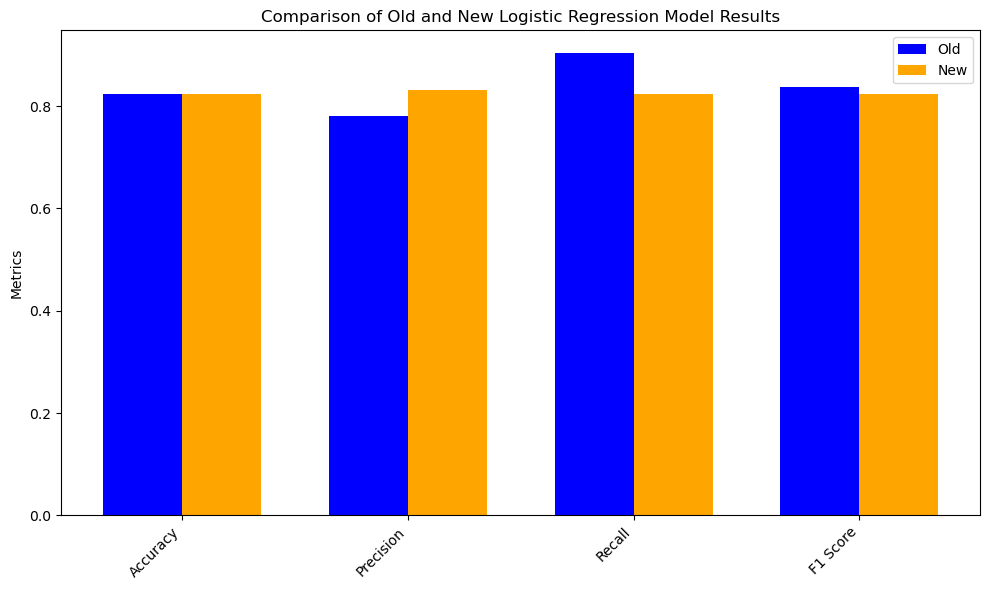

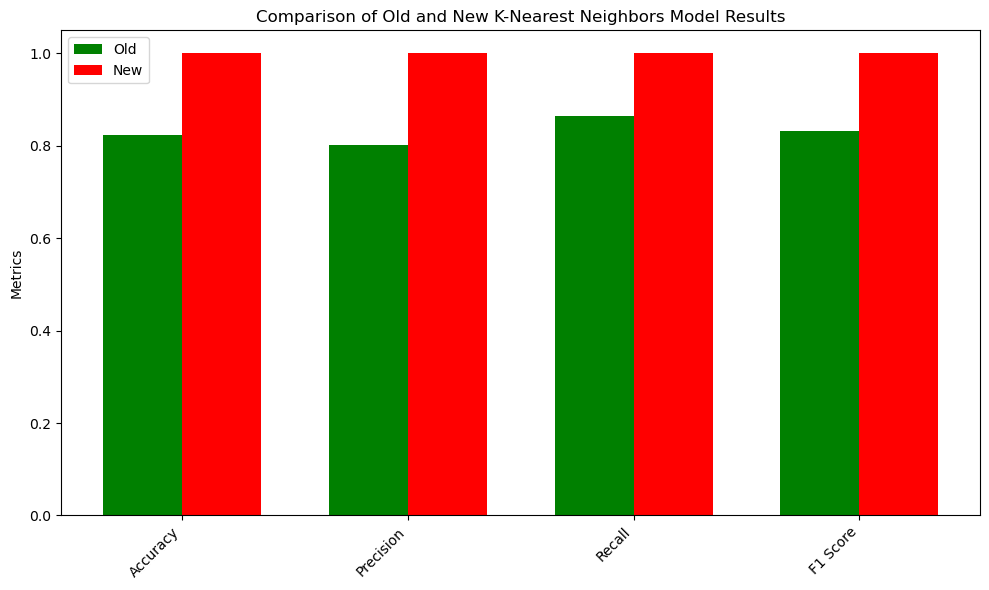

In [46]:
# Metrics for old results from test_df
old_lr_metrics = test_df.loc['Logistic Regression'].values
old_knn_metrics = test_df.loc['K-Nearest Neighbors'].values

# Metrics for new results from test_metrics
new_lr_metrics = list(test_metrics['Logistic Regression'].values())
new_knn_metrics = list(test_metrics['K-Nearest Neighbors'].values())

# Metric names
metric_names = list(test_metrics['Logistic Regression'].keys())

# Bar plot comparison for Logistic Regression
x = np.arange(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Old results
rects1 = ax.bar(x - width/2, old_lr_metrics, width, label='Old', color='blue')

# New results
rects2 = ax.bar(x + width/2, new_lr_metrics, width, label='New', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Old and New Logistic Regression Model Results')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot comparison for K-Nearest Neighbors
fig, ax = plt.subplots(figsize=(10, 6))

# Old results
rects1 = ax.bar(x - width/2, old_knn_metrics, width, label='Old', color='green')

# New results
rects2 = ax.bar(x + width/2, new_knn_metrics, width, label='New', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Old and New K-Nearest Neighbors Model Results')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Deep Learning

In [47]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [48]:
heart_data=pd.read_csv('heart.csv')

In [50]:
# Converting categorical variables to dummy variables
cp = pd.get_dummies(heart_data['cp'], prefix='cp', drop_first=True)
restecg = pd.get_dummies(heart_data['restecg'], prefix='restecg', drop_first=True)
slope = pd.get_dummies(heart_data['slope'], prefix='slope', drop_first=True)
ca = pd.get_dummies(heart_data['ca'], prefix='ca', drop_first=True)
thal = pd.get_dummies(heart_data['thal'], prefix='thal', drop_first=True)

In [52]:
# Concatenate dummy variables with the original dataset
heart_data = pd.concat([heart_data, cp, restecg, slope, ca, thal], axis=1)
heart_data.drop(['cp', 'restecg', 'slope', 'ca', 'thal'], axis=1, inplace=True)

In [53]:
features = heart_data.drop('target', axis=1)

target = heart_data[['target']]

In [55]:
standardScaler = StandardScaler()

scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)

In [56]:
scaled_features.shape

(1025, 22)

In [64]:
# Splitting into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [67]:
def build_and_compile_model():
    # Define input layer
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
 
    # Add hidden layers
    x = layers.Dense(16, activation='relu')(inputs)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(8, activation='relu')(x)
 
    # Output layer
    predictions = layers.Dense(1, activation='sigmoid')(x)
    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    # Display model summary
    model.summary()
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy', 
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5)])
    return model

In [68]:
model = build_and_compile_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 16)                368       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 22), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [70]:
num_epochs = 10

In [71]:
model.fit(dataset_train, epochs=num_epochs)

Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.6285 - accuracy: 0.6894 - precision: 0.6833 - recall: 0.7373
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7528 - precision: 0.7426 - recall: 0.7943
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.5447 - accuracy: 0.7577 - precision: 0.7702 - recall: 0.7532
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.8098 - precision: 0.8080 - recall: 0.8259
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.4752 - accuracy: 0.8081 - precision: 0.8018 - recall: 0.8323
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8114 - precision: 0.8106 - recall: 0.8259
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8260 - precision: 0.8157 - recall: 0.8544
Epoch 8/10
39/39 [==============================] - 0s 

In [72]:
dataset_val = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [73]:
model = build_and_compile_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense_3 (Dense)             (None, 16)                368       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
39/39 [===========

In [74]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

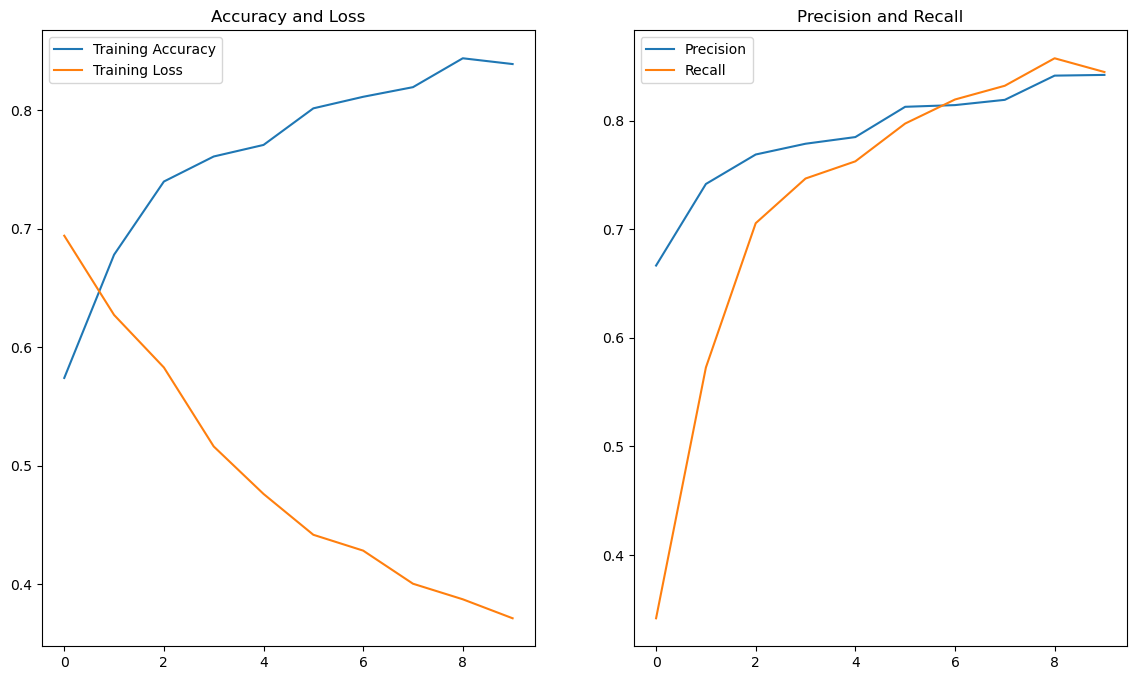

In [75]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

In [76]:
y_pred = model.predict(X_test)

y_pred[:10]

7/7 [==============================] - 0s 3ms/step


array([[0.8855582 ],
       [0.80665326],
       [0.05929797],
       [0.9504313 ],
       [0.15786049],
       [0.6380349 ],
       [0.07047584],
       [0.02118681],
       [0.7820446 ],
       [0.0663484 ]], dtype=float32)

In [77]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [78]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [79]:
pred_results.sample(10)

,y_test,y_pred
100,1,1
54,1,1
5,1,1
84,1,1
26,1,1
39,1,1
136,0,0
78,0,1
138,1,1
80,0,0


In [80]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,80,9
1,22,94


In [81]:
accuracy_score(y_test, y_pred)

0.848780487804878

In [82]:
precision_score(y_test, y_pred)

0.8103448275862069

In [83]:
recall_score(y_test, y_pred)

0.912621359223301

In [85]:
# Defining the 2nd model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compiling 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [86]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
39/39 [==============================] - 1s 9ms/step - loss: 0.8978 - accuracy: 0.5268 - precision_3: 0.5229 - recall_3: 0.9051 - val_loss: 0.6775 - val_accuracy: 0.5854 - val_precision_3: 0.5632 - val_recall_3: 0.9159
Epoch 2/50
39/39 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.5431 - precision_3: 0.5359 - recall_3: 0.8259 - val_loss: 0.6393 - val_accuracy: 0.7268 - val_precision_3: 0.7217 - val_recall_3: 0.7757
Epoch 3/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.5902 - precision_3: 0.5737 - recall_3: 0.7880 - val_loss: 0.6094 - val_accuracy: 0.7805 - val_precision_3: 0.8039 - val_recall_3: 0.7664
Epoch 4/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6179 - precision_3: 0.5976 - recall_3: 0.7848 - val_loss: 0.5775 - val_accuracy: 0.8244 - val_precision_3: 0.8817 - val_recall_3: 0.7664
Epoch 5/50
39/39 [==============================] - 0s 3ms/step - loss: 0.6136 -

In [87]:
# Evaluating the model on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

7/7 [==============================] - 0s 4ms/step


In [88]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9073170731707317
Precision: 0.875
Recall: 0.9514563106796117


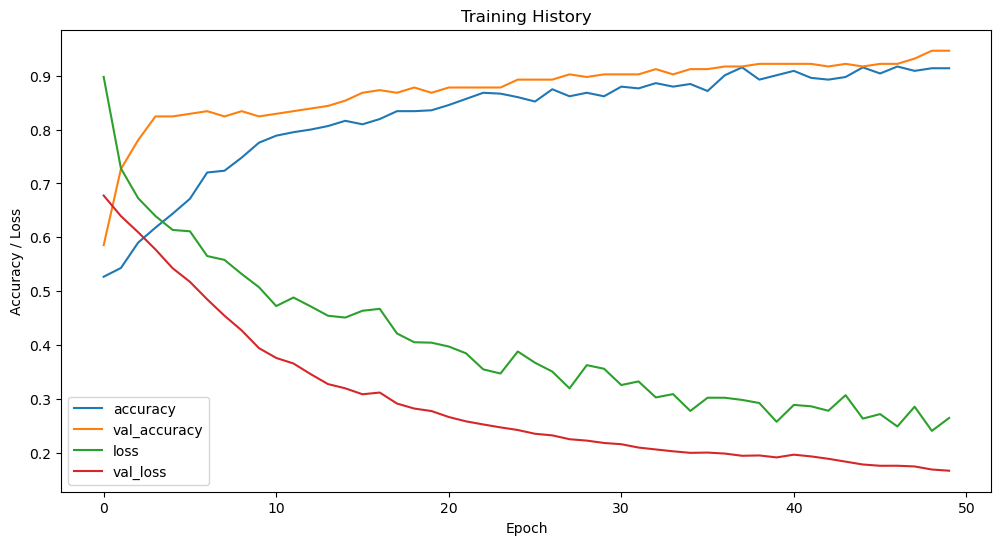

In [89]:
# Plotting training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()